# Introduction

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.

Data sources:

profiles.csv was provided by Codecademy.com.

# Scoping

It's beneficial to create a project scope whenever a new project is being started. Below are four sections to help guide the project process and progress. The first section is the project goals, a section to define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and aligning the question(s) with the project goals. Lastly, evaluation will help build conclusions and findings from the analysis.

# Project goals

The primary objective of this project is to practice formulating questions and implementing machine learning techniques to answer those questions. The specific research question that will be addressed is whether it's possible to predict an OkCupid user's signs using other variables from their profile. This project is significant and for sure is very difficult to approach to an convicend score in order to have a predictive model, but I can learn a lot trying to reach the target.

# Data

The project will use one dataset provided by Codecademy called profiles.csv. The data comprises user profiles, with each row representing an OkCupid user and the columns consisting of their responses to multi-choice and short answer questions.

# Analysis

To understand the distribution, count, and relationship between variables, descriptive statistics and data visualization will be used. Since the project's primary goal is to make predictions about users' astrological signs, supervised learning machine learning models' classification algorithms will be used.

# Evaluation

At the conclusion of the project, the machine learning model will be evaluated using a validation dataset. A confusion matrix and metrics such as accuracy, precision, recall, and F1 scores can be used to verify the predictions' output.

# Load and Check Data

Before proceeding with supervised learning, it is important to verify that the data has a label or response variable. Without a label or response variable, the data cannot be used for supervised learning, and an alternative approach may need to be considered. If the data is missing a crucial piece for analysis, it may be necessary to go back to the previous step and select a different problem to solve that has complete and relevant data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('profiles.csv')



# to know some...

# Data:

- age
- body_type
- diet
- drinks
- drugs
- education
- essay0 - My self-summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at…
- essay3 - The first thing people usually notice about me…
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about…
- essay7 - On a typical Friday night I am…
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…
- ethnicity
- height
- income
- job
- last_online
- location
- offspring - Regarding kids
- orientation - Working, studing?
- pets
- religion
- sex
- sign
- smokes
- speaks - Lenguages that speak
- status

In [3]:
print(df.count())
df.head()

age            59946
body_type      54650
diet           35551
drinks         56961
drugs          45866
education      53318
essay0         54458
essay1         52374
essay2         50308
essay3         48470
essay4         49409
essay5         49096
essay6         46175
essay7         47495
essay8         40721
essay9         47343
ethnicity      54266
height         59943
income         59946
job            51748
last_online    59946
location       59946
offspring      24385
orientation    59946
pets           40025
religion       39720
sex            59946
sign           48890
smokes         54434
speaks         59896
status         59946
dtype: int64


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
print(df.describe())

                age        height          income
count  59946.000000  59943.000000    59946.000000
mean      32.340290     68.295281    20033.222534
std        9.452779      3.994803    97346.192104
min       18.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max      110.000000     95.000000  1000000.000000


# I proceed to see which are the 'NaN' data on the DataFrame

### I need to assess their importance of 'NaN' values in order to decide whether to delete the rows, convert them to strings, or/and use them for making predictions


In [5]:
print(f"Porcentaje %: \n \n{((df.isnull().sum())/len(df)).sort_values(ascending = False) * 100}")

Porcentaje %: 
 
offspring      59.321723
diet           40.694959
religion       33.740366
pets           33.231575
essay8         32.070530
drugs          23.487806
essay6         22.972342
essay9         21.023922
essay7         20.770360
essay3         19.143896
sign           18.443266
essay5         18.099623
essay4         17.577486
essay2         16.077803
job            13.675641
essay1         12.631368
education      11.056618
ethnicity       9.475194
smokes          9.194942
essay0          9.154906
body_type       8.834618
drinks          4.979482
speaks          0.083408
height          0.005005
sex             0.000000
age             0.000000
orientation     0.000000
location        0.000000
last_online     0.000000
income          0.000000
status          0.000000
dtype: float64


# Now, let's  check it out the differents variables and future category data :

In [6]:
df.pets.value_counts()

pets
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64

In [7]:
df.education.value_counts(normalize = True)

education
graduated from college/university    0.449360
graduated from masters program       0.168067
working on college/university        0.107131
working on masters program           0.031565
graduated from two-year college      0.028715
graduated from high school           0.026783
graduated from ph.d program          0.023857
graduated from law school            0.021044
working on two-year college          0.020143
dropped out of college/university    0.018662
working on ph.d program              0.018437
college/university                   0.015023
graduated from space camp            0.012322
dropped out of space camp            0.009809
graduated from med school            0.008365
working on space camp                0.008346
working on law school                0.005045
two-year college                     0.004164
working on med school                0.003976
dropped out of two-year college      0.003582
dropped out of masters program       0.002626
masters program         

In [8]:
print(df.religion.value_counts())

religion
agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too s

In [9]:
df.speaks.value_counts()

speaks
english                                                                21828
english (fluently)                                                      6628
english (fluently), spanish (poorly)                                    2059
english (fluently), spanish (okay)                                      1917
english (fluently), spanish (fluently)                                  1288
                                                                       ...  
english (fluently), urdu (poorly), japanese (poorly), french (okay)        1
english, spanish, hindi, c++                                               1
english (fluently), japanese (okay), thai (okay), chinese (poorly)         1
english (fluently), french (okay), italian (okay), hebrew (okay)           1
english (fluently), french, farsi                                          1
Name: count, Length: 7647, dtype: int64

In [10]:
df.offspring.value_counts()

offspring
doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: count, dtype: int64

In [11]:
print(df.status.value_counts())

status
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: count, dtype: int64


In [12]:
df.location.value_counts(normalize = True)

location
san francisco, california         0.518200
oakland, california               0.120342
berkeley, california              0.070263
san mateo, california             0.022203
palo alto, california             0.017749
                                    ...   
south wellfleet, massachusetts    0.000017
orange, california                0.000017
astoria, new york                 0.000017
london, united kingdom            0.000017
rochester, michigan               0.000017
Name: proportion, Length: 199, dtype: float64

In [13]:
bins = [18, 25, 35, 45, 60, 120]
df['age_category'] = pd.cut(df.age, bins)

# Lets see dfferents forms to visualize the distribution of age

Number people by sex: sex
m    35829
f    24117
Name: count, dtype: int64


Number people agrupated by age: age_category
(25, 35]     28621
(18, 25]     14145
(35, 45]     10803
(45, 60]      5102
(60, 120]      966
Name: count, dtype: int64


Number of people accoring the status:
status
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: count, dtype: int64




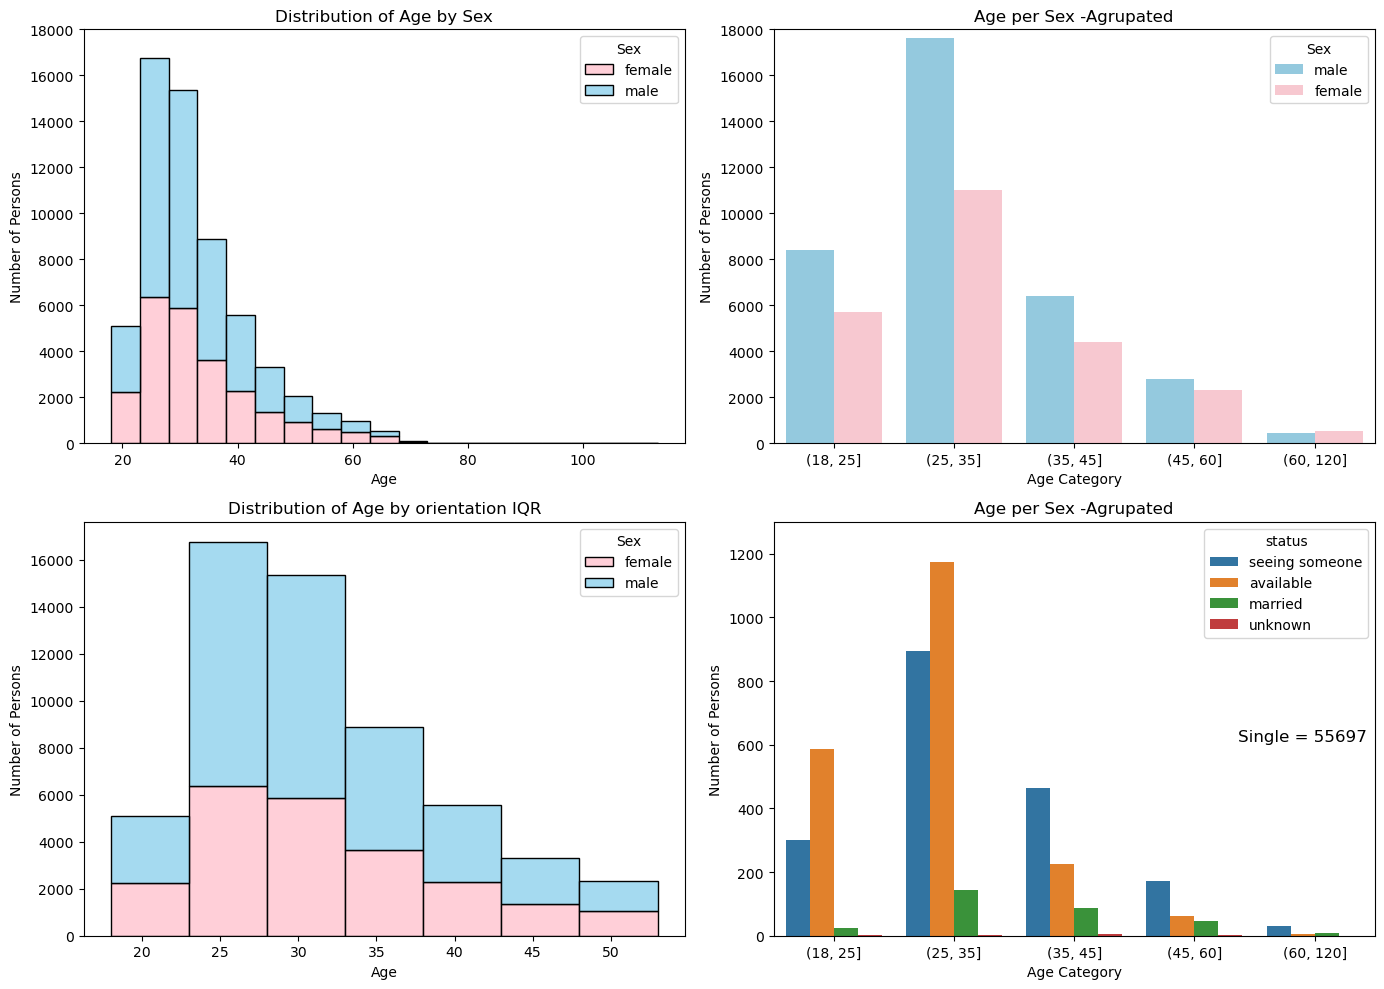

In [14]:
print(f"Number people by sex: {df.sex.value_counts()}\n\n")
print(f"Number people agrupated by age: {df.age_category.value_counts()}\n\n")
print(f"Number of people accoring the status:\n{df.status.value_counts()}\n\n")
plt.figure(figsize=(14, 10))

# Primer subgráfico
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='age', hue='sex', multiple='stack', palette={'m': 'skyblue', 'f': 'pink'}, binwidth=5)

plt.xlabel('Age')
plt.ylabel('Number of Persons')
plt.title('Distribution of Age by Sex')
plt.legend(title='Sex', labels=['female', 'male'])
plt.ylim(0,18000)

# Segundo subgráfico
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='age_category', hue='sex', palette={'m': 'skyblue', 'f': 'pink'})

plt.xlabel('Age Category')
plt.ylabel('Number of Persons')
plt.ylim(0,18000)
plt.title('Age per Sex -Agrupated')
plt.legend(title='Sex', labels=['male', 'female'])

# Tercer subgráfico

Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filterQ =df[(df.age >= lower_bound) & (df.age <= upper_bound)]

plt.subplot(2, 2, 3)
sns.histplot(data=df_filterQ, x='age', hue='sex', multiple='stack', palette={'m': 'skyblue', 'f': 'pink'}, binwidth=5)

plt.xlabel('Age')
plt.ylabel('Number of Persons')
plt.title('Distribution of Age by orientation IQR')
plt.legend(title='Sex', labels=['female', 'male'])

# Cuarto subgráfico

filtered_df_status = df[df['status'].isin(['seeing someone', 'available','married','unknown'])]
plt.subplot(2, 2, 4)
sns.countplot(data=filtered_df_status, x='age_category', hue='status')

plt.xlabel('Age Category')
plt.ylabel('Number of Persons')
plt.ylim(0,1300)
plt.title('Age per Sex -Agrupated')

single = df.status[df.status == 'single'].value_counts()[0]
labels = ['seeing someone', 'available','married','unknown']

plt.legend(title='status', labels= labels)
plt.text(x=3.9,  # Coordenada X (ajustar según la posición deseada)
    y=plt.ylim()[1] * 0.5,  # Coordenada Y (ajustar para que esté visible en la parte superior del gráfico)
    s=f'Single = {single}',  # Texto a mostrar
    fontsize=12,  # Tamaño de la fuente
    ha='center',  # Alineación horizontal
    va='top',  # Alineación vertical
    bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')  # Fondo del texto para hacerlo más visible
)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

orientation
straight    51606
gay          5573
bisexual     2767
Name: count, dtype: int64





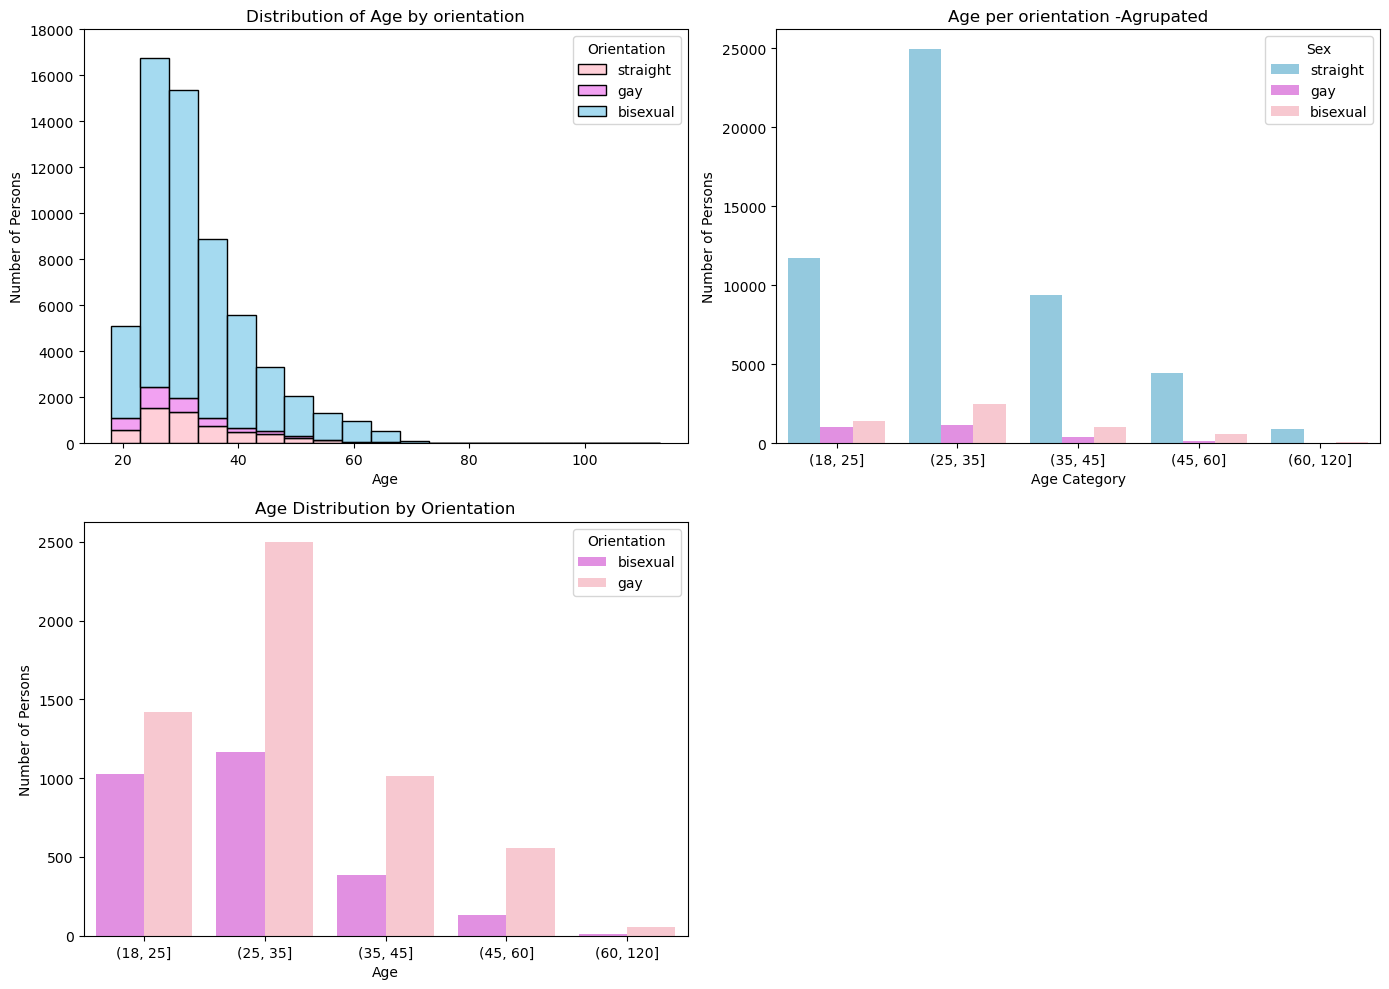

In [15]:
print(f"{df.orientation.value_counts()}\n\n\n")
plt.figure(figsize=(14, 10))

# Primer subgráfico
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='age', hue='orientation', multiple='stack', palette={'straight': 'skyblue', 'gay': 'pink', 'bisexual': 'violet'}, binwidth=5)
plt.xlabel('Age')
plt.ylabel('Number of Persons')
plt.title('Distribution of Age by orientation')
plt.legend(title='Orientation', labels=['straight', 'gay', 'bisexual'])
plt.ylim(0,18000)

# Segundo subgráfico

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='age_category', hue='orientation', palette={'straight': 'skyblue', 'gay': 'pink', 'bisexual': 'violet'})
plt.xlabel('Age Category')
plt.ylabel('Number of Persons')
plt.title('Age per orientation -Agrupated')
plt.legend(title='Sex', labels=['straight', 'gay', 'bisexual'])

# Tercer subgráfico

filtered_df = df[df['orientation'].isin(['gay', 'bisexual'])]

plt.subplot(2, 2, 3)
sns.countplot(data=filtered_df, x='age_category', hue='orientation', palette={'gay': 'pink', 'bisexual': 'violet'})

plt.xlabel('Age')
plt.ylabel('Number of Persons')
plt.title('Age Distribution by Orientation')
plt.legend(title='Orientation')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [16]:
print(f"Income by age_category: \n\n {df.groupby(df.age_category).income.describe()}")


Income by age_category: 

                 count          mean            std  min  25%  50%  75%  \
age_category                                                             
(18, 25]      14145.0  20631.935171  116842.806379 -1.0 -1.0 -1.0 -1.0   
(25, 35]      28621.0  19687.870969   97801.309127 -1.0 -1.0 -1.0 -1.0   
(35, 45]      10803.0  21072.974729   82021.143396 -1.0 -1.0 -1.0 -1.0   
(45, 60]       5102.0  19434.721482   67927.177919 -1.0 -1.0 -1.0 -1.0   
(60, 120]       966.0  15910.175983   55132.180749 -1.0 -1.0 -1.0 -1.0   

                    max  
age_category             
(18, 25]      1000000.0  
(25, 35]      1000000.0  
(35, 45]      1000000.0  
(45, 60]      1000000.0  
(60, 120]     1000000.0  


In [17]:
print(f"Count of -1 in data: {df.income[df.income == -1].sum()}")


Count of -1 in data: -48442


In [18]:
df.income = df.income.replace(-1, 0)
print(df.income[(df.income != 0) & (df.income < 200000)].describe())
df_income_filter = df.income[(df.income != 0) & (df.income < 200000)]

count     10786.000000
mean      57362.321528
std       36426.691482
min       20000.000000
25%       20000.000000
50%       50000.000000
75%       80000.000000
max      150000.000000
Name: income, dtype: float64


Number of people with a valid Income: 10786


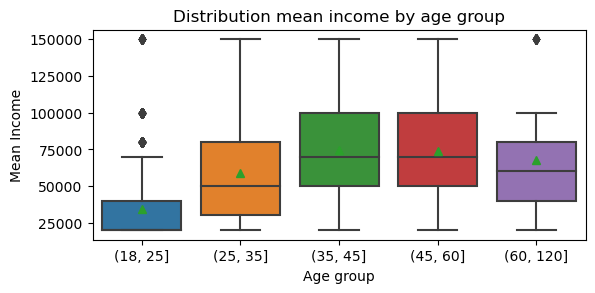

In [19]:
# Primer subgráfico
print(f"Number of people with a valid Income: {df.income[(df.income != 0) & (df.income < 200000)].count()}")
income_by_category = df.groupby('age_category')['income'].mean().reset_index()
plt.figure(figsize =(14, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='age_category', y=df.income[(df.income != 0) & (df.income < 200000)], data=df, showmeans=True)

plt.xlabel('Age group')
plt.ylabel('Mean Income')
plt.title('Distribution mean income by age group')

plt.show()


# I am curious: Just to see if is there any relationship among men and woman with drugs consumption

In [20]:
from scipy.stats import chi2_contingency

# separate the men and women
men_df = df[df.sex == 'm'].dropna(subset='drugs')
fem_df = df[df.sex == 'f'].dropna(subset='drugs')

# determine the size of the smaller group
n = len(fem_df)

# randomly select a subset of the men
men_df = men_df.sample(n=n, random_state=42)

# concatenate the men and women back together
balanced = pd.concat([men_df, fem_df])

cross = pd.crosstab(balanced.sex, balanced.drugs)
print(f"Consumption of drugs among gender in percentage %:\n\n {round(cross/n * 100, 2)}")

Consumption of drugs among gender in percentage %:

 drugs  never  often  sometimes
sex                           
f      84.86   0.69      14.45
m      80.57   1.00      18.43


# Is there a significant difference in drug consumption between genders?


In [21]:
# chi-squared test on the balanced data
chi2, pval, dof, expected = chi2_contingency(cross)
print(f"pval, Less than 0,05 means a significant difference: {pval}")

pval, Less than 0,05 means a significant difference: 3.3712616665113124e-27


The extremely low p-value (3.37e-27) indicates that there is a statistically significant difference in drug consumption patterns between men and women. This means that the distribution of drug use between men and women is not the same.

# We are going to clean the data, create some new columns in order to see a logical distribution among categories

 ## This is the data cleaned; it's the one that we are going to work on it:

In [22]:
df['religion_cleaned'] = df.religion.str.split().str.get(0)
df['sign_cleaned'] = df.sign.str.split().str.get(0)
print(df.isna().sum())
df.shape

age                     0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
orientation             0
pets                19921
religion            20226
sex                     0
sign                11056
smokes               5512
speaks                 50
status                  0
age_category          309
religion_cleaned    20226
sign_cleaned        11056
dtype: int64


(59946, 34)

In [23]:
data_selected = ['body_type', 'diet', 'orientation', 'pets', 'sign_cleaned', 'sex', 'job', 'smokes', 'drinks', 'religion_cleaned']

# clean all null data
df_clean = df[data_selected].dropna(subset = data_selected).reset_index(drop = True)

print(df_clean.isna().sum())
df_clean.shape



body_type           0
diet                0
orientation         0
pets                0
sign_cleaned        0
sex                 0
job                 0
smokes              0
drinks              0
religion_cleaned    0
dtype: int64


(15751, 10)

# Preparing the model

In [24]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15751 entries, 0 to 15750
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   body_type         15751 non-null  object
 1   diet              15751 non-null  object
 2   orientation       15751 non-null  object
 3   pets              15751 non-null  object
 4   sign_cleaned      15751 non-null  object
 5   sex               15751 non-null  object
 6   job               15751 non-null  object
 7   smokes            15751 non-null  object
 8   drinks            15751 non-null  object
 9   religion_cleaned  15751 non-null  object
dtypes: object(10)
memory usage: 1.2+ MB
None


# We proceed to an Label Encoding in order to prepare the features:

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# create an instance of LabelEncoder
le = LabelEncoder()

# loop through each column in cols and transform it using LabelEncoder
for col in data_selected:
    df_clean[col] = le.fit_transform(df_clean[col])

In [26]:
df_clean.religion_cleaned.value_counts()

religion_cleaned
0    3671
8    3339
1    2687
4    2163
3    1859
7    1062
2     788
5     136
6      46
Name: count, dtype: int64

In [27]:
# X are the features (we exclude the target)  and y is the target
X = df_clean.drop(columns = 'religion_cleaned')
y = df_clean.religion_cleaned

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)


# turn in to 1d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()


# DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier()
tree_class.fit(X_train, y_train)

DecisionTreeClassifier()

We try with the model: Decision Tree Classifer, 

In [30]:
from sklearn.metrics import classification_report


print("Score with DecisionTreeClassifier: ", tree_class.score(X_train, y_train))
y_pred= tree_class.predict(X_test)
classification_report_str = classification_report(y_test, y_pred)

# Mostrar el reporte de clasificación
print("Classification Report:\n", classification_report_str)

# Crear y mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Score with DecisionTreeClassifier:  0.9408279014644882
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.27      0.26       952
           1       0.22      0.24      0.23       647
           2       0.05      0.07      0.06       187
           3       0.17      0.16      0.17       497
           4       0.17      0.17      0.17       515
           5       0.00      0.00      0.00        34
           6       0.14      0.12      0.13         8
           7       0.10      0.10      0.10       269
           8       0.26      0.23      0.24       829

    accuracy                           0.21      3938
   macro avg       0.15      0.15      0.15      3938
weighted avg       0.21      0.21      0.21      3938

Confusion Matrix:
 [[257 186  47 108 114   9   2  72 157]
 [178 157  48  55  61   8   2  31 107]
 [ 47  27  13  24  20   1   1  11  43]
 [113  65  26  80  83   2   0  48  80]
 [118  76  31  72  85   9   0  36  88]
 [

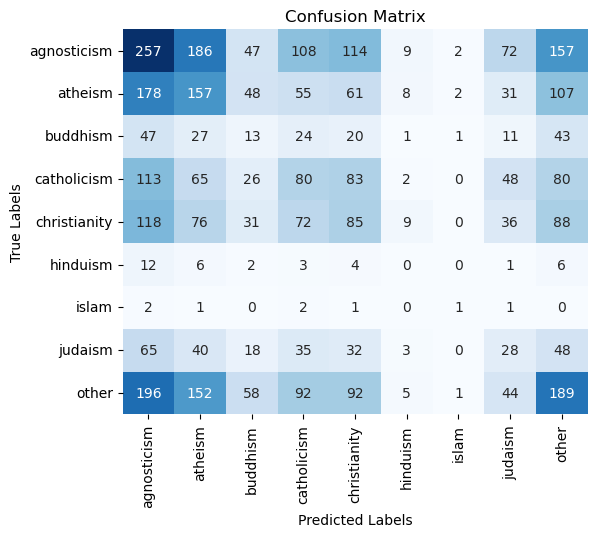

In [31]:
# Configurar la figura del mapa de calor
plt.figure(figsize=(6, 5))

# Crear el mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=le.classes_, yticklabels=le.classes_)

# Añadir etiquetas y título
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Mostrar el mapa de calor
plt.show()


# Train a Random Forest Classifier

### Models like Random Forests, have more hyperparameters that can be fine-tuned compared to a simple Decision Tree.

### This allows these models to be more flexible and achieve better predictive performance on a wider range of datasets. Decision Trees are often used as a baseline model because they are easy to understand, but they can be prone to overfitting and may not capture complex patterns as well as more sophisticated models.

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
# train a Random Forest classifier
rf = RandomForestClassifier()

params = {'max_depth': list(range(1, 11)),
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}
clf = GridSearchCV(rf, params, scoring='accuracy', cv=5, n_jobs=-1)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

## We'll find the better hyperparameters to incorporate on the model

In [33]:
# make predictions on test set
y_pred = clf.predict(X_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred, zero_division=1))

print(clf.best_params_)
print(clf.best_score_)

0.27805992889791775
              precision    recall  f1-score   support

           0       0.28      0.53      0.36       952
           1       0.27      0.20      0.23       647
           2       1.00      0.00      0.00       187
           3       0.23      0.07      0.11       497
           4       0.23      0.20      0.21       515
           5       1.00      0.00      0.00        34
           6       1.00      0.00      0.00         8
           7       0.00      0.00      1.00       269
           8       0.31      0.39      0.35       829

    accuracy                           0.28      3938
   macro avg       0.48      0.15      0.25      3938
weighted avg       0.29      0.28      0.31      3938

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.27088794472217215


### We use the better hyperparameters on the  model to improve the prediction

In [34]:
rf = RandomForestClassifier(n_estimators=150, max_depth=7, min_samples_leaf=2, min_samples_split=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=150, random_state=42)

In [35]:
# make predictions on test set
y_pred = rf.predict(X_test)

# evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred, zero_division=1))

0.28339258506856274
              precision    recall  f1-score   support

           0       0.28      0.64      0.38       952
           1       0.31      0.14      0.20       647
           2       1.00      0.00      0.00       187
           3       0.18      0.02      0.04       497
           4       0.22      0.16      0.19       515
           5       1.00      0.00      0.00        34
           6       1.00      0.00      0.00         8
           7       1.00      0.00      0.00       269
           8       0.32      0.38      0.35       829

    accuracy                           0.28      3938
   macro avg       0.59      0.15      0.13      3938
weighted avg       0.36      0.28      0.23      3938



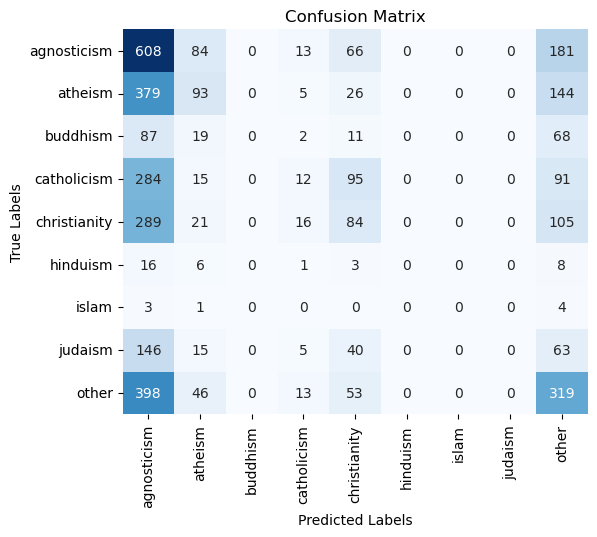

In [36]:
cm = confusion_matrix(y_test, y_pred)

# Configurar la figura del mapa de calor
plt.figure(figsize=(6, 5))

# Crear el mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=le.classes_, yticklabels=le.classes_)

# Añadir etiquetas y título
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Mostrar el mapa de calor
plt.show()

# MODEL KNN

In [37]:
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:

from sklearn.neighbors import KNeighborsClassifier


# Definir el modelo KNN
knn = KNeighborsClassifier()

# Definir la rejilla de hiperparámetros
param_grid = {
    'n_neighbors': [3, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajustar el GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros
print("Best parameters found: ", grid_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)
print("Accuracy with optimized parameters: ", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy with optimized parameters:  0.24022346368715083


In [40]:

# Evaluar el rendimiento del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.24022346368715083
[[437 206   9  72  72   0   0  13 143]
 [290 150  10  35  30   0   0  10 122]
 [ 76  33   2  14  12   0   0   3  47]
 [199  77   6  72  58   0   0  12  73]
 [216  70   9  53  74   0   0  11  82]
 [ 12   9   0   4   5   0   0   0   4]
 [  2   2   0   0   0   0   0   0   4]
 [102  43   3  36  26   0   0   9  50]
 [329 118   9  80  82   0   0   9 202]]
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.4s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.7s
[CV] END ...metric=euclidean, n_neighbors=7, weights=uniform; total time=   0.8s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   0.3s
[CV] END ..metric=euclidean, n_neighbors=7, weights=distance; total time=   0.3s
[CV] END ...metric=euclidean, n_neighbors=9, weights=uniform; total time=   0.7s
[CV] END ..metric=euclidean, n_neighbors=9, weights=distance; total time=   0.6s
[CV] END ...metric=euclidean, n_neighbors=3, weight